In [140]:
import numpy as np
import matplotlib.pyplot as plt

In [142]:
N = 2**3
dt = 1/N

dW = np.sqrt(dt) * np.random.randn(1, N)
W = np.cumsum(dW)
print(dW, W)

[[ 0.13067728 -0.16992913  0.36852028  0.38851133 -0.75409769  0.26841927
  -0.10082666  0.16985108]] [ 0.13067728 -0.03925186  0.32926842  0.71777975 -0.03631794  0.23210132
  0.13127466  0.30112574]


In [144]:
T = 1
print(np.arange(dt, T + dt, dt))

[0.125 0.25  0.375 0.5   0.625 0.75  0.875 1.   ]


## Euler Maruyama Method

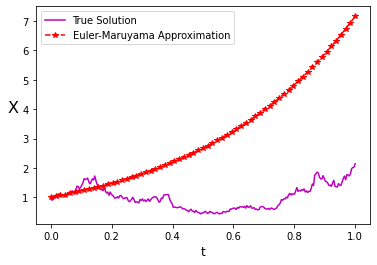

Euler-Maruyama error: 5.023640850170661


In [14]:


# Set random seed
np.random.seed(100)

# SDE parameters
lambda_val = 2
mu = 1
Xzero = 1

# Simulation parameters
T = 1
N = 2**8
dt = 1/N

# Discretized Brownian path
dW = np.sqrt(dt) * np.random.randn(1, N)
W = np.cumsum(dW)

# True solution
Xtrue = Xzero * np.exp((lambda_val - 0.5 * mu**2) * np.arange(dt, T + dt, dt) + mu * W)

# Plot true solution
plt.plot(np.arange(0, T + dt, dt), [Xzero] + list(Xtrue), 'm-', label='True Solution')

# Euler-Maruyama parameters
R = 4
Dt = R * dt
L = int(N / R)

# Initialize variables for efficiency
Xem = np.zeros(L)
Xtemp = Xzero

# Euler-Maruyama method
for j in range(L):
    Winc = np.sum(dW[R * (j - 1) + 1:R * j])
    Xtemp = Xtemp + Dt * lambda_val * Xtemp + mu * Xtemp * Winc
    Xem[j] = Xtemp

# Plot Euler-Maruyama approximation
plt.plot(np.arange(0, T + Dt, Dt), [Xzero] + list(Xem), 'r--*', label='Euler-Maruyama Approximation')
plt.legend()
plt.xlabel('t', fontsize=12)
plt.ylabel('X', fontsize=16, rotation=0, ha='right')
plt.show()

# Calculate and print Euler-Maruyama error
emerr = np.abs(Xem[-1] - Xtrue[-1])
print(f"Euler-Maruyama error: {emerr}")


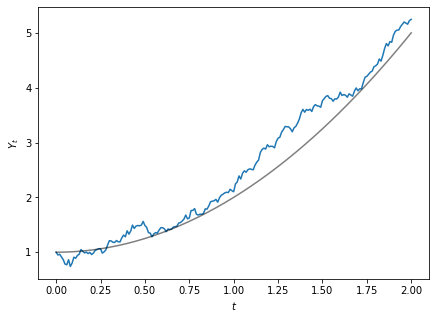

In [186]:
# Define the time discretisation
t_0 = 0
T = 2
N = 200
delta = (T-t_0)/N
steps = np.arange(0, N+1)
t = t_0 + steps*delta

# Set initial condition and pre-allocate Y sequence into an array
Y_0 = 1
Y = np.zeros(N+1)
Y[0] = Y_0

# define drift and diffusion coefficients
def get_drift(X: float, t: float) -> float:
    return 2*t

def get_diffusion(X: float, t: float) -> float:
    return 0.5

for n in steps[:-1]:  # Compute until N-1
    tau_n = t[n]  # get time step n
    Y_n = Y[n]  # get Y at n
    
    mu = get_drift(X=Y_n, t=tau_n)  # in this case, mu = 2*tau
    sigma = get_diffusion(X=Y_n, t=tau_n)  # in this case, sigma = 0.5
   
    # Compute Brownian increment, recall standard deviation = sqrt(variance)
    # in this case, variance = \tau_{n+1} - \tau_{n} = \delta 
    dW = np.random.normal(loc=0, scale=np.sqrt(delta))
    
    # Compute next step of the EM scheme
    Y[n+1] = Y_n + mu*delta + sigma*dW

# Plot the random path obtained and the drift of the SDE
fig, ax = plt.subplots(figsize=(7, 5))

ax.plot(t, Y)
ax.plot(t, 1+t**2, color="black", alpha=0.5)

ax.set_xlabel(r"$t$")
ax.set_ylabel(r"$Y_t$")

plt.show()

## Polar Coordinates

In [173]:
def solve_ode_rtheta(r0, theta0, a, f, num_steps, dt):
    r_values, theta_values = [], []
    r, theta = r0, theta0
    for _ in range(num_steps):
        drdt = r * (a - r**2)
        dthetadt = 2 * np.pi * f
        r += drdt * dt
        theta += dthetadt * dt
        
        # Ensure theta stays within the range [-pi, pi]
        theta = np.mod(theta, 2 * np.pi)
        if theta > np.pi:
            theta -= 2 * np.pi
        elif theta < -np.pi:
            theta += 2 * np.pi
        
        r_values.append(r)
        theta_values.append(theta)
    return r_values, theta_values


def get_z_values(r_values, theta_values):
    x_values = np.array(r_values) * np.cos(theta_values)
    y_values = np.array(r_values) * np.sin(theta_values)
    z_values = np.sqrt(x_values**2 + y_values**2)
    return z_values

def plot_polar_cord(a, f):
# Parameters
    r0 = 0.1
    theta0 = 0
    num_steps = 1000
    dt = 0.1

    # Solve ODE
    r_values, theta_values = solve_ode_rtheta(r0, theta0, a, f, num_steps, dt)
    z_values = get_z_values(r_values, theta_values)

    # # Plot r
    # plt.figure(figsize=(10, 5))
    # plt.plot(r_values, label='r')
    # plt.xlabel('Time Steps')
    # plt.ylabel('r')
    # plt.title('Solution of ODE for r')
    # plt.legend()
    # plt.grid(True)
    # plt.show()

    # # Plot theta
    # plt.figure(figsize=(10, 5))
    # plt.plot(theta_values, label='theta')
    # plt.xlabel('Time Steps')
    # plt.ylabel('theta')
    # plt.title('Solution of ODE for theta')
    # plt.legend()
    # plt.grid(True)
    # plt.show()

    # Plot z
    plt.figure(figsize=(10, 5))
    plt.plot(z_values, label='Z')
    plt.xlabel('Time Steps')
    plt.ylabel('Z')
    plt.title('Solution of ODE for Z')
    plt.legend()
    plt.grid(True)
    plt.show()

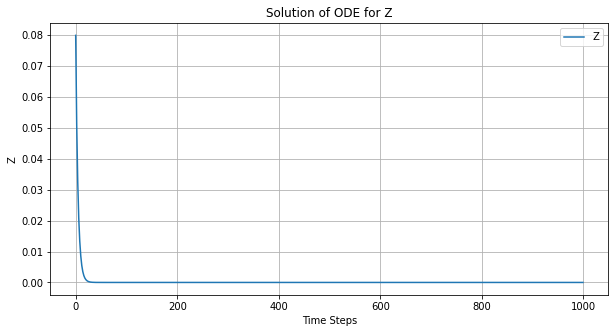

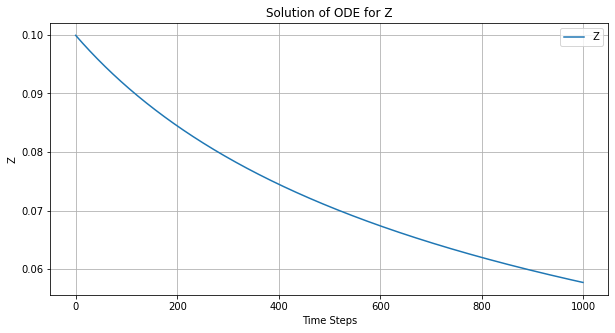

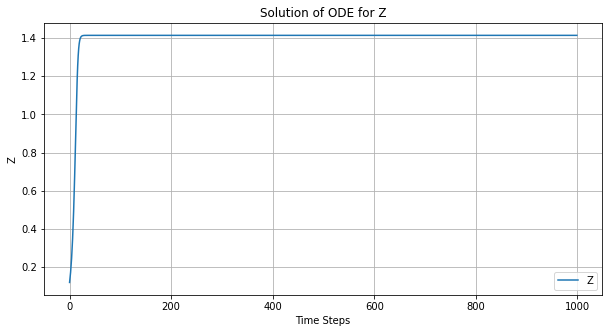

In [174]:
plot_polar_cord(-2, 12)
plot_polar_cord(0, 12)
plot_polar_cord(2, 12)

## Cartesian coordinates

In [201]:
def solve_ode_xy(x0, y0, a, f, num_steps, dt, beta):
    x_values, y_values, z_values = [], [], []
    x, y = x0, y0
    omega = f*2*np.pi
    for _ in range(num_steps):
        # Generate a single random noise term
        noise = np.random.normal(loc=0.0, scale=np.sqrt(dt))

        # dxdt = (a-x**2-y**2)*x - omega*y 
        # dydt = (a-x**2-y**2)*y + omega*x 

        dxdt = (a-x**2-y**2)*x - omega*y + beta * noise
        dydt = (a-x**2-y**2)*y + omega*x + beta * noise
        x += dxdt * dt
        y += dydt * dt
        z = np.sqrt(x**2 + y**2)

        x_values.append(x)
        y_values.append(y)
        z_values.append(z)
    return x_values, y_values, z_values


def plot_xy_cord(a, f):
    x0 = 0.5
    y0 = 0.5
    num_steps = 614
    dt = 0.01
    beta = 50  # Intensity of noise

    x_values, y_values, z_values = solve_ode_xy(x0, y0, a, f, num_steps, dt, beta)

    # Create subplots
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    # Plot z
    axes[0].plot(z_values, label='Z')
    axes[0].set_xlabel('Time Steps')
    axes[0].set_ylabel('Z')
    axes[0].set_title('Solution of ODE for Z')
    axes[0].legend()
    axes[0].grid(True)

    # Plot x
    axes[1].plot(x_values, label='x')
    axes[1].set_xlabel('Time Steps')
    axes[1].set_ylabel('x')
    axes[1].set_title('Solution of ODE for x')
    axes[1].legend()
    axes[1].grid(True)

    # Plot y
    axes[2].plot(y_values, label='Y')
    axes[2].set_xlabel('Time Steps')
    axes[2].set_ylabel('Y')
    axes[2].set_title('Solution of ODE for Y')
    axes[2].legend()
    axes[2].grid(True)

    fig.suptitle(f'Solution of ODEs for a={a}, f={f}', fontsize=16)
    # Adjust layout
    plt.tight_layout()
    plt.show()




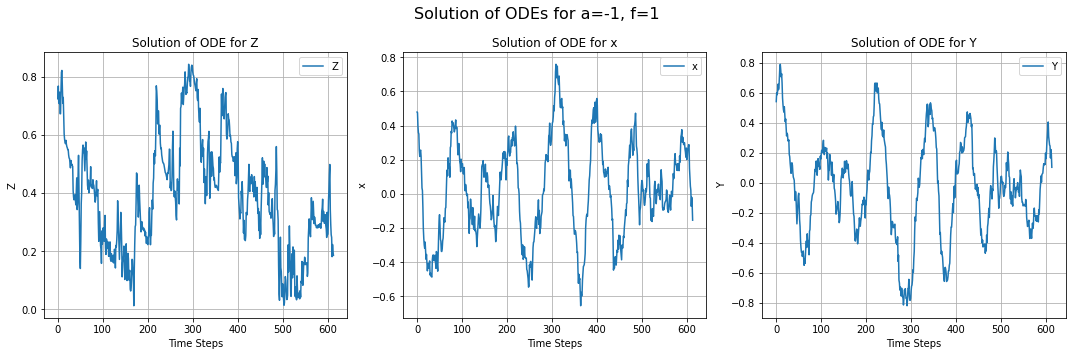

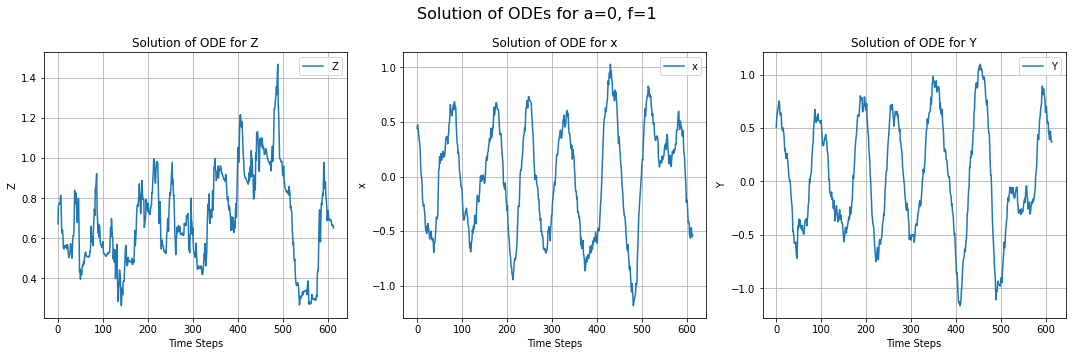

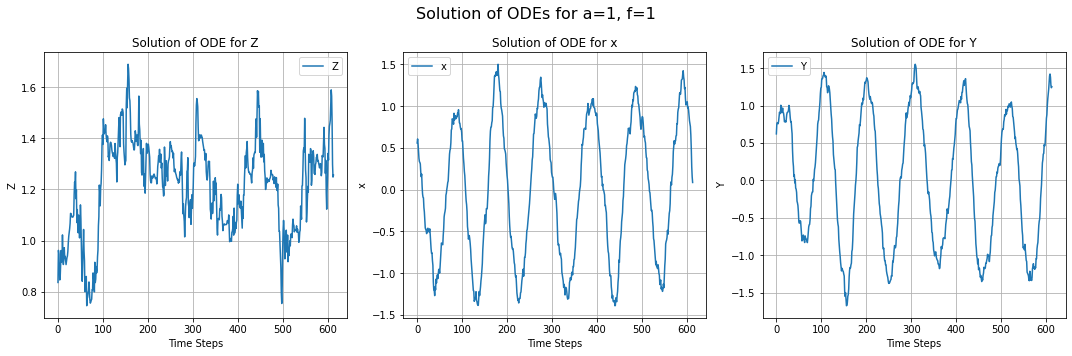

In [202]:
plot_xy_cord(-1,1)
plot_xy_cord(0, 1)
plot_xy_cord(1,1)